## Домашнее задание<a class='anchor' id='hw'>

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

### Реализация алгоритма градиентного бустинга<a class='anchor' id='implement'>

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y - z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z - y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1301.8758322784097
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4095.853175910213


Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [11]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

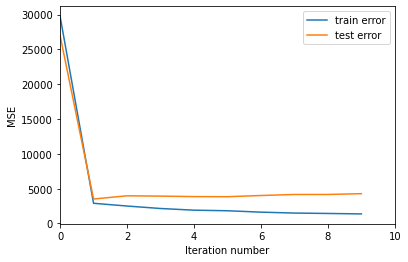

In [12]:
get_error_plot(n_trees, train_errors, test_errors)

##### 1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.


In [137]:
%%time
n_trees = [1, 5, 10, 25, 50] # массив количества деревьев

max_depth = 3

eta = 0.1
train_e = [] # массивы ошибок на трейне и тесте
test_e = []

for tree in n_trees:
    trees, train_errors, test_errors = gb_fit(tree, max_depth, X_train, X_test, y_train, y_test, eta)
    train_e.append(train_errors) # запоминаем ошибки на каждой итерации 
    test_e.append(test_errors) # запоминаем ошибки на каждой итерации 

CPU times: user 3min 15s, sys: 2.45 s, total: 3min 18s
Wall time: 3min 21s


In [138]:
# находим минимальные ошибки для каждого количества деревьев

test = []
train = []
for i in range(len(n_trees)):
    train.append(np.min(train_e[i]))
    test.append(np.min(test_e[i]))



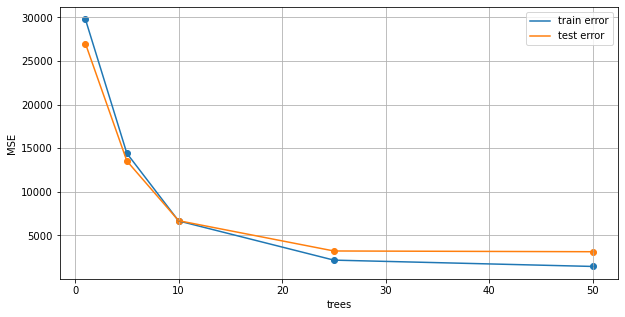

In [139]:
plt.figure(figsize = (10, 5))
plt.xlabel('trees')
plt.ylabel('MSE')
plt.grid()
plt.plot(n_trees, train, label='train error')
plt.plot(n_trees, test, label='test error')
plt.scatter(n_trees, train)
plt.scatter(n_trees, test)
plt.legend(loc='upper right')
plt.show()


Ошибка изменяется плавно как на трейне, так и на тесте.

In [140]:
%%time
n_trees = 15

max_depth = [1, 3, 5, 7, 9] # массив глубины деревьев

eta = 0.1
train_e = []
test_e = []

for depth in max_depth:
    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta)
    train_e.append(train_errors)
    test_e.append(test_errors)

CPU times: user 1min 9s, sys: 764 ms, total: 1min 10s
Wall time: 1min 12s


In [141]:
test = []
train = []
for i in range(len(max_depth)):
    train.append(np.min(train_e[i]))
    test.append(np.min(test_e[i]))



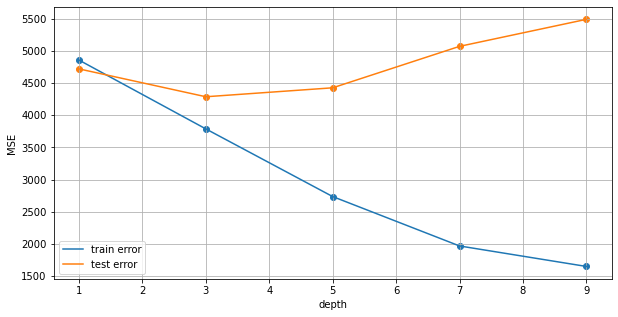

In [144]:
plt.figure(figsize = (10, 5))
plt.xlabel('depth')
plt.ylabel('MSE')
plt.grid()
plt.plot(max_depth, train, label='train error')
plt.plot(max_depth, test, label='test error')
plt.scatter(max_depth, train)
plt.scatter(max_depth, test)
plt.legend(loc='lower left')
plt.show()

Ошибка плавно уменьшается на трейне, но на тесте начинает увеличиваться, после глубины дерева 3. 
То есть модель начинает переобучаться.

##### 2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [205]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, batch_size):
    
    np.random.seed(1234)
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
        
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        ind_count = int(round(X.shape[0]*batch_size)) # batch_size - размер выборки
        x_ind = []
        for i in range(ind_count):
            x_ind.append(np.random.randint(ind_count)) # получаем индексы по размеру выборки

        if len(trees) == 0:
            tree.fit(X_train[x_ind], y_train[x_ind])
            
            train_errors.append(mean_squared_error(y_train[x_ind], gb_predict(X_train[x_ind], trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            target = gb_predict(X_train[x_ind], trees, eta)
            
                
            tree.fit(X_train[x_ind], residual(y_train[x_ind], target))
            
            train_errors.append(mean_squared_error(y_train[x_ind], gb_predict(X_train[x_ind], trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [206]:
%%time
n_trees = 25

max_depth = 5

eta = 0.1

batch_size = 0.5

trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, batch_size)

CPU times: user 26.9 s, sys: 334 ms, total: 27.2 s
Wall time: 27.5 s


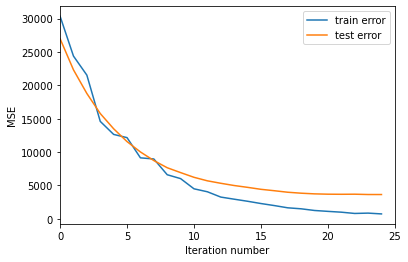

In [207]:
get_error_plot(n_trees, train_errors, test_errors)

Ниже обычный бустинг с такими же параметрами для сравнения времени работы.

In [208]:
%%time
n_trees = 25

max_depth = 5

eta = 0.1

# batch_size = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

CPU times: user 38.4 s, sys: 380 ms, total: 38.8 s
Wall time: 39.5 s


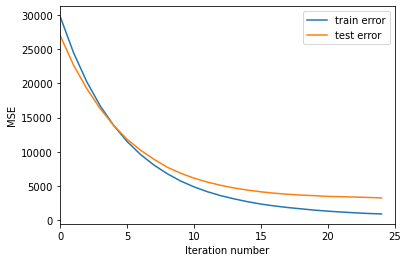

In [209]:
get_error_plot(n_trees, train_errors, test_errors)

Время работы GB - 39.5 секунд
Время работы SGB - 27.5 секунд